In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image

In [107]:
arboles = pd.read_csv(r'C:\Users\usuario\Documents\Inducción\arbolado-publico-lineal.csv', delimiter=',')

In [108]:
arboles.head()

,long,lat,tipo_sitio,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,Árbol,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,Árbol,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,Árbol,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,Árbol,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,Árbol,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


In [4]:
arboles.shape

(372699, 20)

In [5]:
arboles.describe()

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,comuna,chapa1,chapa2
count,372699.000000,372699.000000,3.726990e+05,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000,372699.000000
mean,-58.458557,-34.613313,2.710713e+07,8.473044,31.941234,3.069783,38.704625,9.124524,1895.056155,40.593200
std,0.041818,0.034253,4.134062e+07,4.576818,20.207216,6.029910,141.187146,3.866483,1917.141983,386.192396
min,-58.530413,-34.702639,2.430000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,-58.491355,-34.639264,1.661610e+05,5.000000,17.000000,0.000000,1.000000,6.000000,0.000000,0.000000
50%,-58.465525,-34.615745,1.700314e+07,8.000000,28.000000,0.000000,3.000000,10.000000,1449.000000,0.000000
75%,-58.428723,-34.586781,3.810204e+07,11.000000,43.000000,5.000000,10.000000,12.000000,3181.000000,0.000000
max,-58.342784,-34.534262,9.380002e+08,60.000000,426.000000,60.000000,999.000000,15.000000,16392.000000,14038.000000


In [8]:
#Vemos que el dataset se encuentra limpio de nulls
arboles.isnull().sum()

long          0
lat           0
tipo_sitio    0
id_arbol      0
altura_tot    0
diametro      0
inclinacio    0
id_especie    0
nombre_fam    0
nombre_gen    0
nombre_cie    0
nombre_com    0
tipo_folla    0
origen        0
codigo_man    0
barrio        0
comuna        0
calle         0
chapa1        0
chapa2        0
dtype: int64

In [109]:
#Dropreamos los 5 nans del dataset
arboles = arboles.dropna()

In [110]:
arboles.shape

(372694, 20)

In [11]:
print("La cantidad de nulos luego de limpiar los datos es: "+ str(arboles.isnull().sum().max()))

La cantidad de nulos luego de limpiar los datos es: 0


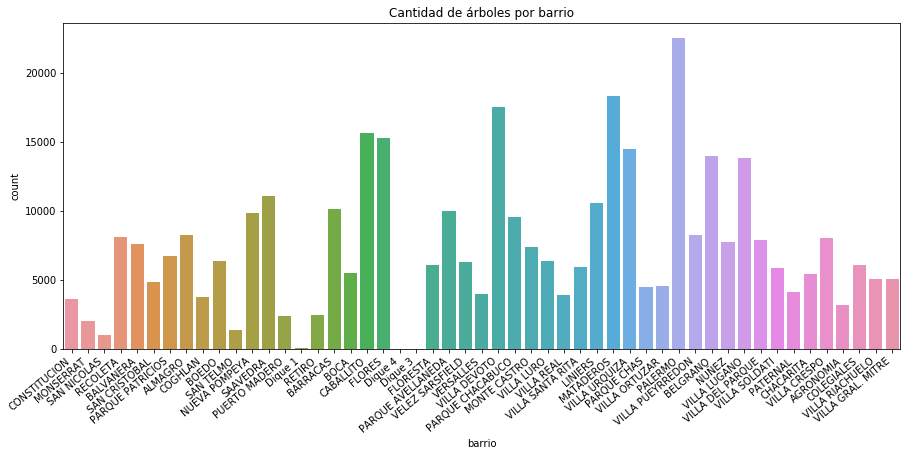

In [12]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="barrio", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por barrio")
plt.show()

In [15]:
print("El TOP5 de barrios con mayor cantidad de árboles es:                                                                           " 
      + str(arboles.barrio.value_counts(ascending=False).head()))

El TOP5 de barrios con mayor cantidad de árboles es:                                                                           PALERMO         22483
MATADEROS       18289
VILLA DEVOTO    17537
CABALLITO       15660
FLORES          15278
Name: barrio, dtype: int64


In [16]:
print("tipo_sitio")
print(arboles.tipo_sitio.unique())

tipo_sitio
['Árbol']


In [17]:
print("tipo_folla")
print(arboles.tipo_folla.unique())

tipo_folla
['Árbol Latifoliado Caducifolio' 'Árbol Latifoliado Perenne'
 'No Determinado' 'Arbusto Perenne' 'Árbol Conífero Perenne' 'Palmera'
 'Arbusto o Herbacea' 'Arbusto Caducifolio' 'Árbol Conífero Caducifolio'
 'Miscelaneo']


In [43]:
print("origen")
print(arboles['origen'].unique())

origen
['Exótico' 'Nativo/Autóctono' 'No Determinado']


In [44]:
print("nombre_gen")
print(arboles['nombre_fam'].unique())

nombre_gen
['Oleáceas' 'Aceráceas' 'Rosáceas' 'Moráceas' 'Tiliaceas' 'Leguminosas'
 'Rutaceas' 'Litráceas' 'No identificada' 'Hamamelidáceas' 'Bignoniáceas'
 'Platanaceae' 'Meliáceas' 'Pináceas' 'Bombacáceas' 'Mirtáceas'
 'Simarrubáceas' 'Ginkgoaceas' 'Lauráceas' 'Salicáceas' 'Arecaceas'
 'Araliaceas' 'Malvácea' 'Anacardiáceas' 'Fagáceas' 'Pitosporáceas'
 'Proteáceas' 'Apocynaceae' 'Cupresáceas' 'Magnoliáceas' 'Ulmaceas'
 'Hipocastanáceas' 'Euforbiáceas' 'Betuláceas' 'Juglandáceas'
 'Caprifoliaceas' 'Esterculiáceas' 'Verbenaceas' 'Araucariaceas'
 'Ruscaceae' 'Fitolacáceas' 'Solanaceas' 'Cicadaceas' 'Casuarinaceas'
 'Agavaceae' 'Rubiaceae' 'Taxodiáceas' 'Adoxaceae' 'Sapindaceas'
 'Musaceae' 'Sterculiaceae' 'Menispermaceas' 'Ebenaceas' 'Celtidacea'
 'Borragináceas' 'Buxaceas' 'Cervantesiaceae' 'Palmaceas' 'Teaceae'
 'Ramnaceas' 'Punicaceas' 'Mioporaceas' 'Podocarpaceae' 'Paulowniaceae'
 'Combretaceae' 'Polygonaceas']


In [52]:
arboles.tipo_folla.value_counts(ascending=False).head()

Árbol Latifoliado Caducifolio    296880
Árbol Latifoliado Perenne         56061
No Determinado                    12761
Palmera                            2908
Árbol Conífero Perenne             1431
Name: tipo_folla, dtype: int64

In [66]:
print("Los Árbol Latifoliado Caducifolio representan el " + str (round(arboles.tipo_folla.value_counts(ascending=False)[0]/len(arboles),3)*100)+"% de los arboles de la ciudad")
print("Los Árbol Latifoliado Perenne representan el " + str (round(arboles.tipo_folla.value_counts(ascending=False)[1]/len(arboles),2)*100)+"% de los arboles de la ciudad")


Los Árbol Latifoliado Caducifolio representan el 79.7% de los arboles de la ciudad
Los Árbol Latifoliado Perenne representan el 15.0% de los arboles de la ciudad


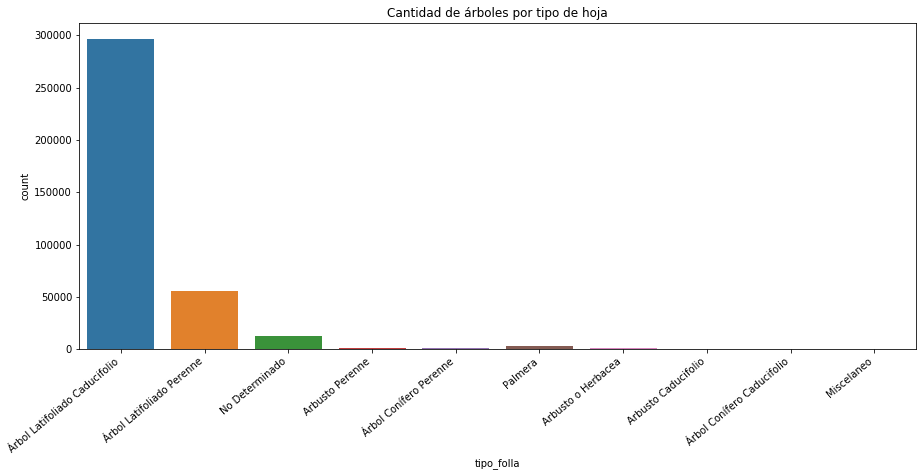

In [19]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="tipo_folla", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por tipo de hoja")

plt.show()

In [20]:
print("El TOP3 de cantidad de arboles por tipo de hoja son:                                                                           " 
      + str(arboles.tipo_folla.value_counts(ascending=False).head(3)))

El TOP3 de cantidad de arboles por tipo de hoja son:                                                                           Árbol Latifoliado Caducifolio    296880
Árbol Latifoliado Perenne         56061
No Determinado                    12761
Name: tipo_folla, dtype: int64


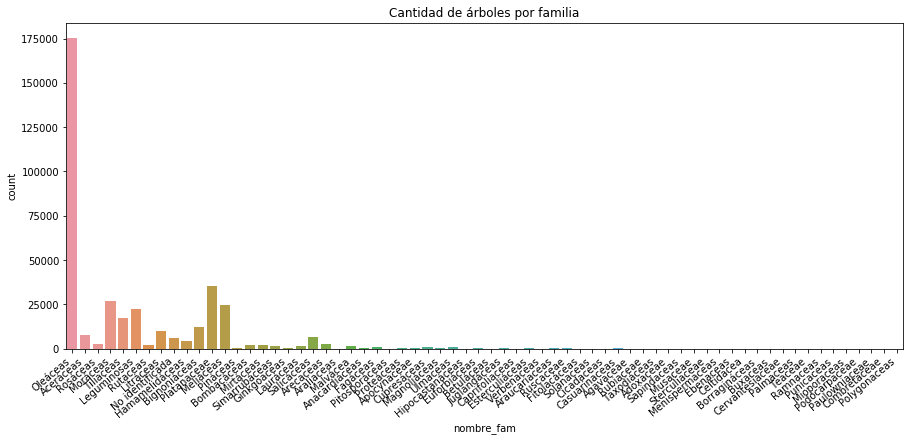

In [21]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="nombre_fam", data=arboles)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de árboles por familia")

plt.show()

In [22]:
print("El TOP5 de cantidad de arboles por tipo de familia es:                                                                           " 
      + str(arboles.nombre_fam.value_counts(ascending=False).head()))

El TOP5 de cantidad de arboles por tipo de familia es:                                                                           Oleáceas       175247
Platanaceae     35152
Moráceas        27064
Meliáceas       24681
Leguminosas     22355
Name: nombre_fam, dtype: int64


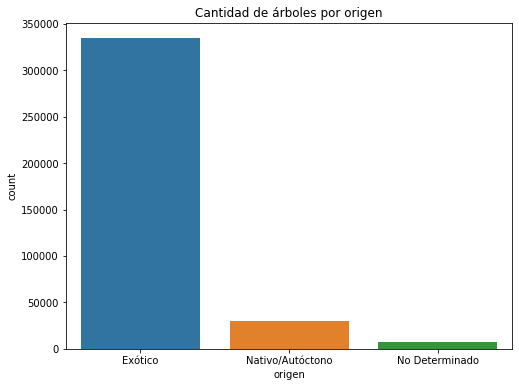

In [23]:
plt.figure (figsize=(8,6))
ax = sns.countplot(x="origen", data=arboles)
plt.title("Cantidad de árboles por origen")

plt.show()

In [24]:
print("Cantidad de arboles por origen:                                                                                                "+str(arboles.origen.value_counts(ascending=False).head(3)))

Cantidad de arboles por origen:                                                                                                Exótico             334503
Nativo/Autóctono     30410
No Determinado        7781
Name: origen, dtype: int64


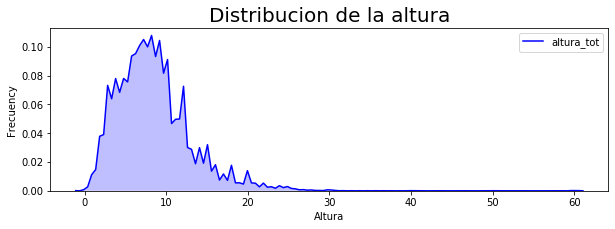

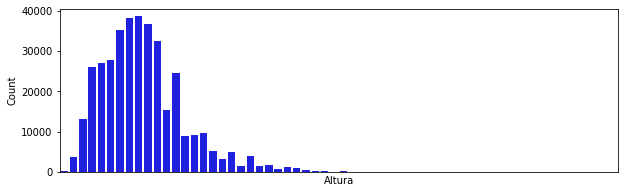

In [25]:
plt.figure(figsize=(10,3))
sns.kdeplot(arboles.altura_tot, color="Blue", shade = True)
plt.xlabel("Altura")
plt.ylabel("Frecuency")
plt.title('Distribucion de la altura',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(arboles.altura_tot, color="Blue")
plt.xlabel("Altura")
plt.ylabel("Count")
plt.xticks([])
plt.show()


In [33]:
print('La media es: ' + str(round(np.mean(arboles.altura_tot),2)))
print(np.median(arboles.altura_tot))


La media es: 8.47
8.0


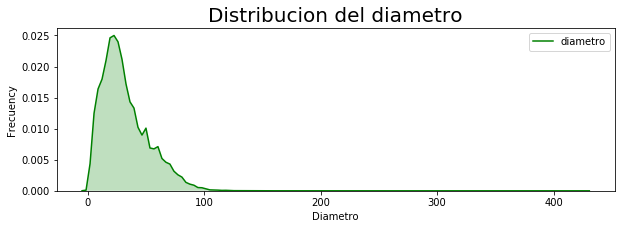

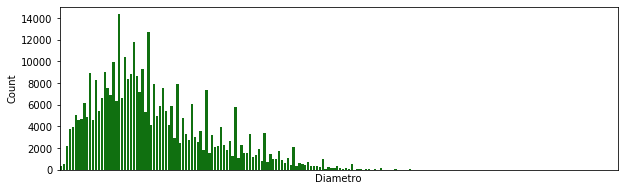

In [34]:
plt.figure(figsize=(10,3))
sns.kdeplot(arboles.diametro, color="Green", shade = True)
plt.xlabel("Diametro")
plt.ylabel("Frecuency")
plt.title('Distribucion del diametro',size = 20)
plt.show()

plt.figure(figsize=(10,3))
sns.countplot(arboles.diametro, color="Green")
plt.xlabel("Diametro")
plt.ylabel("Count")
plt.xticks([])
plt.show()

In [39]:
#¿Tiene en cuenta el espacio ocupado por las raíces del árbol? El dato carece de sentido. ¿Estará bien cargado?
print(round(np.mean(arboles.diametro),2))
print(np.median(arboles.diametro))

31.94
28.0


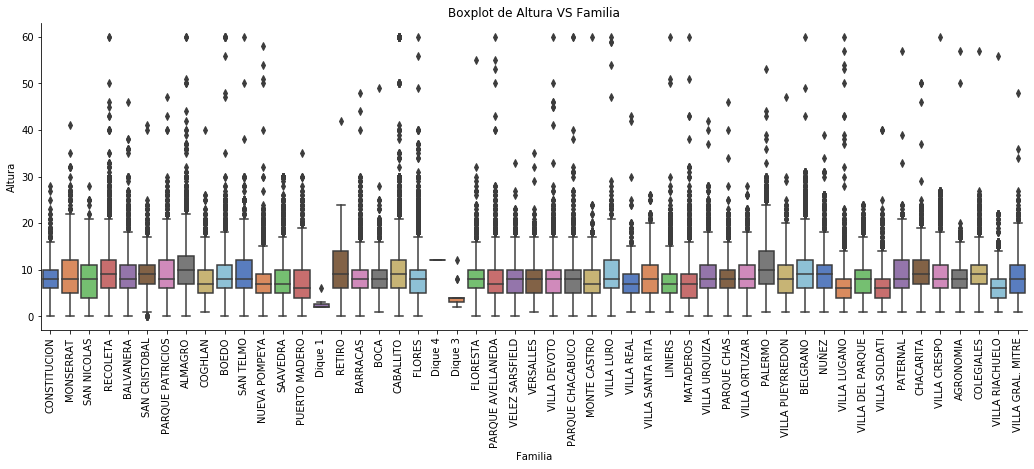

In [40]:
g = sns.catplot(x="barrio",y="altura_tot",data=arboles, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=False) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)

plt.xlabel("Familia")
plt.ylabel("Altura")
plt.title('Boxplot de Altura VS Familia',size = 12)
plt.show()

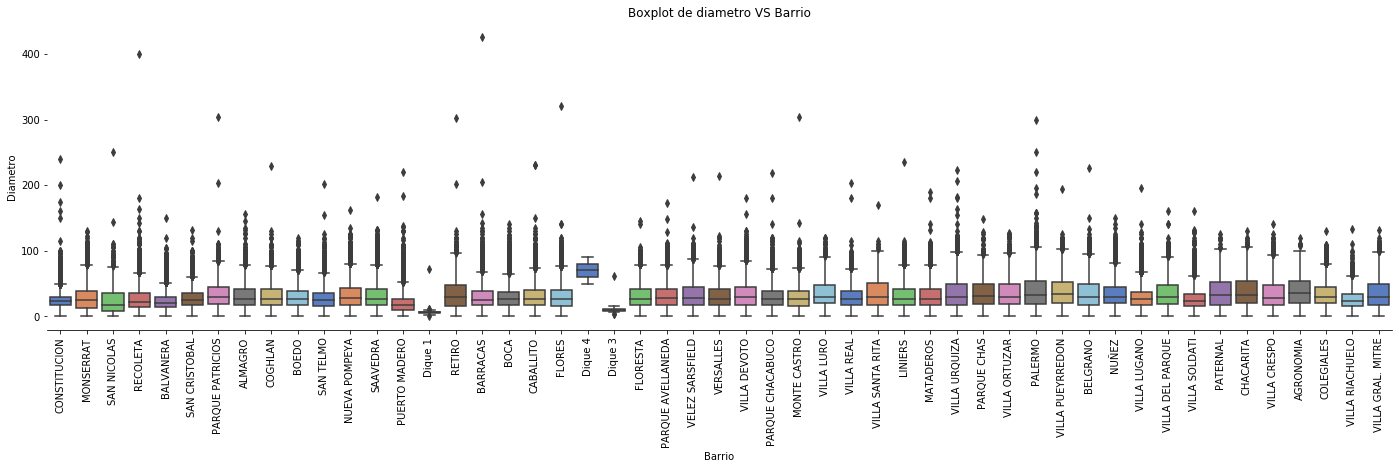

In [41]:
g = sns.catplot(x="barrio",y="diametro",data=arboles, kind="box", height = 5 ,aspect=4,palette = "muted")
g.despine(left=True) # Para quitar los el eje Y del plot
g.set_xticklabels(rotation=90)

plt.xlabel("Barrio")
plt.ylabel("Diametro")
plt.title('Boxplot de diametro VS Barrio',size = 12)
plt.show()

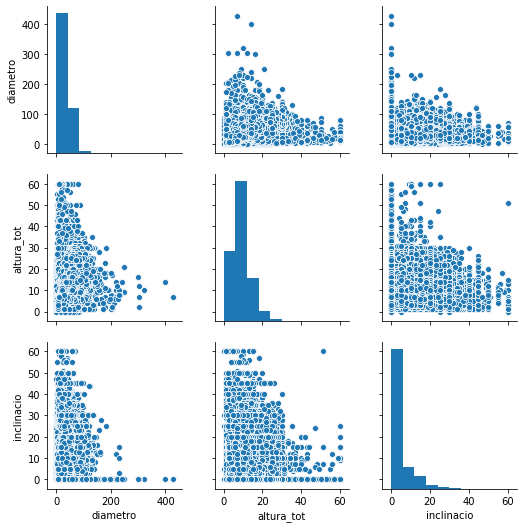

In [45]:
#No podemos sacar ninguna conclusión en base al pairplot
sns.pairplot(arboles[["diametro", "altura_tot", "inclinacio", "nombre_fam", "tipo_folla"]])
plt.show()

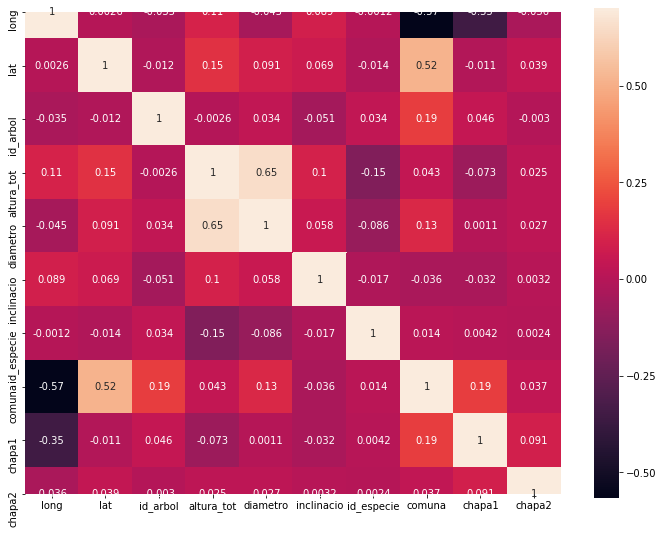

In [47]:
#Se observa una correlacion lineal relativamente fuerte entre Altura y Diámetro. Con el resto de las features no podemos
#sacar ningún tipo de conclusión.
#A más cerca de 1, mayor correlación positiva. A más cerca de -1, mayor correlación negativa. 
#Entre-0,5 y 0,5 no hay correlación lineal 
corrmat = arboles.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.7, square=True, annot=True);

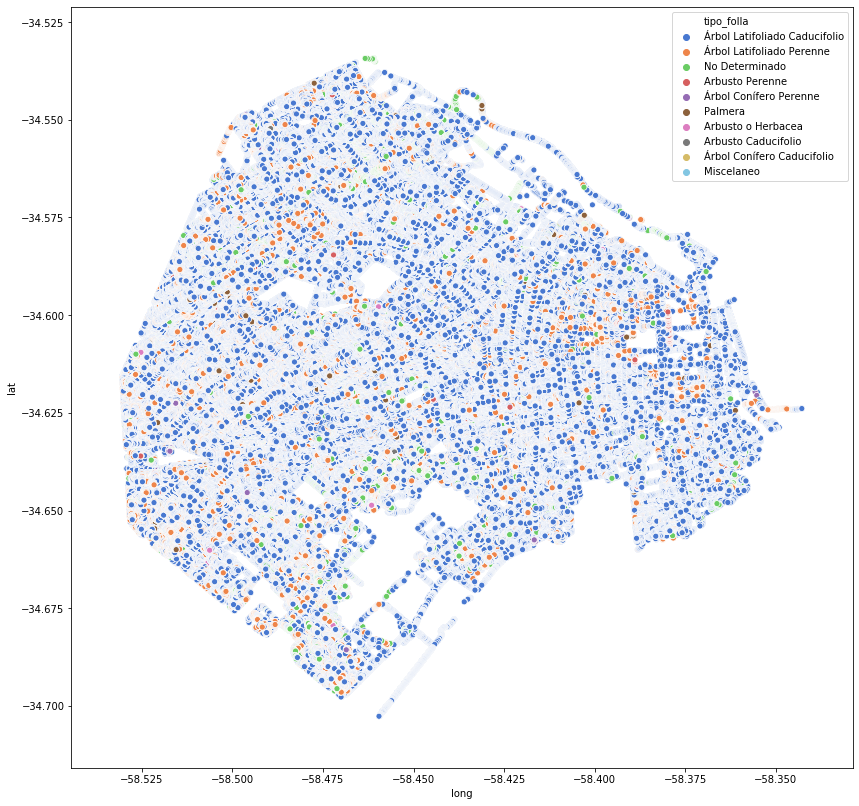

In [67]:
#Distribución geográfica de los árboles segun su tipo de hoja en CABA
plt.figure(figsize=(14,14))
sns.scatterplot(arboles.long, arboles.lat, hue=arboles.tipo_folla, palette='muted')
plt.show()

In [68]:
arboles.head()

,long,lat,tipo_sitio,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_fam,nombre_gen,nombre_cie,nombre_com,tipo_folla,origen,codigo_man,barrio,comuna,calle,chapa1,chapa2
0,-58.389059,-34.620026,Árbol,2430,7,20,17,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1609,0
1,-58.389211,-34.620034,Árbol,2431,8,33,16,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1617,0
2,-58.389269,-34.620037,Árbol,2432,2,3,0,9,Oleáceas,Ligustrum,Ligustrum lucidum,Ligustro,Árbol Latifoliado Perenne,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1629,0
3,-58.389525,-34.620052,Árbol,2433,9,17,0,7,Aceráceas,Acer,Acer negundo,Arce negundo,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",0,0
4,-58.389608,-34.620057,Árbol,2434,6,13,14,1,Oleáceas,Fraxinus,Fraxinus pennsylvanica,Fresno americano,Árbol Latifoliado Caducifolio,Exótico,14-017,CONSTITUCION,1,"Calvo, Carlos",1655,0


In [111]:
arboles = arboles.drop(['chapa2','chapa1','calle','codigo_man','id_especie','nombre_cie','nombre_gen','nombre_com','id_arbol','tipo_sitio','barrio'],axis=1)


In [112]:
arboles.head()

,long,lat,altura_tot,diametro,inclinacio,nombre_fam,tipo_folla,origen,comuna
0,-58.389059,-34.620026,7,20,17,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1
1,-58.389211,-34.620034,8,33,16,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1
2,-58.389269,-34.620037,2,3,0,Oleáceas,Árbol Latifoliado Perenne,Exótico,1
3,-58.389525,-34.620052,9,17,0,Aceráceas,Árbol Latifoliado Caducifolio,Exótico,1
4,-58.389608,-34.620057,6,13,14,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1


In [113]:
np.shape(arboles)

(372694, 9)

In [72]:
arboles.isnull().sum()

long          0
lat           0
altura_tot    0
diametro      0
inclinacio    0
tipo_folla    0
origen        0
comuna        0
dtype: int64

In [114]:
arboles1 = pd.concat([arboles, pd.get_dummies(arboles['origen'],)], axis=1)
arboles1.head()

,long,lat,altura_tot,diametro,inclinacio,nombre_fam,tipo_folla,origen,comuna,Exótico,Nativo/Autóctono,No Determinado
0,-58.389059,-34.620026,7,20,17,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,0,0
1,-58.389211,-34.620034,8,33,16,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,0,0
2,-58.389269,-34.620037,2,3,0,Oleáceas,Árbol Latifoliado Perenne,Exótico,1,1,0,0
3,-58.389525,-34.620052,9,17,0,Aceráceas,Árbol Latifoliado Caducifolio,Exótico,1,1,0,0
4,-58.389608,-34.620057,6,13,14,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,0,0


In [115]:
arboles2 = pd.concat([arboles1, pd.get_dummies(arboles['nombre_fam'],)], axis=1)
arboles2.head()

,long,lat,altura_tot,diametro,inclinacio,nombre_fam,tipo_folla,origen,comuna,Exótico,...,Salicáceas,Sapindaceas,Simarrubáceas,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas
0,-58.389059,-34.620026,7,20,17,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-58.389211,-34.620034,8,33,16,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-58.389269,-34.620037,2,3,0,Oleáceas,Árbol Latifoliado Perenne,Exótico,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-58.389525,-34.620052,9,17,0,Aceráceas,Árbol Latifoliado Caducifolio,Exótico,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-58.389608,-34.620057,6,13,14,Oleáceas,Árbol Latifoliado Caducifolio,Exótico,1,1,...,0,0,0,0,0,0,0,0,0,0


In [122]:
arboles3 = arboles2.drop(['origen'],axis=1)
arboles3 = arboles2.drop(['nombre_fam'],axis=1)
arboles3.head()

,long,lat,altura_tot,diametro,inclinacio,tipo_folla,origen,comuna,Exótico,Nativo/Autóctono,...,Salicáceas,Sapindaceas,Simarrubáceas,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas
0,-58.389059,-34.620026,7,20,17,Árbol Latifoliado Caducifolio,Exótico,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-58.389211,-34.620034,8,33,16,Árbol Latifoliado Caducifolio,Exótico,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-58.389269,-34.620037,2,3,0,Árbol Latifoliado Perenne,Exótico,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-58.389525,-34.620052,9,17,0,Árbol Latifoliado Caducifolio,Exótico,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-58.389608,-34.620057,6,13,14,Árbol Latifoliado Caducifolio,Exótico,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
arboles3 = arboles3.drop(['origen'],axis=1)
arboles3.head()

,long,lat,altura_tot,diametro,inclinacio,tipo_folla,comuna,Exótico,Nativo/Autóctono,No Determinado,...,Salicáceas,Sapindaceas,Simarrubáceas,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas
0,-58.389059,-34.620026,7,20,17,Árbol Latifoliado Caducifolio,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-58.389211,-34.620034,8,33,16,Árbol Latifoliado Caducifolio,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-58.389269,-34.620037,2,3,0,Árbol Latifoliado Perenne,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-58.389525,-34.620052,9,17,0,Árbol Latifoliado Caducifolio,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-58.389608,-34.620057,6,13,14,Árbol Latifoliado Caducifolio,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
np.shape(arboles3)

(372694, 76)

# Aplicar modelo de Clasificacion donde las comunas serian el vector Y (etiquetas 1,2,3,) y la matriz X será el tipo de arbol y sus características. La idea es clasificar con las caracteristicas de arboles que comuna es

In [129]:
X = arboles3.iloc[:,:]
Y = arboles3.iloc[:,5]

In [130]:
X = X.drop(['tipo_folla'], axis=1)

In [131]:
print(X.shape)
print(Y.shape)

(372694, 75)
(372694,)


In [132]:
X.head()

,long,lat,altura_tot,diametro,inclinacio,comuna,Exótico,Nativo/Autóctono,No Determinado,Aceráceas,...,Salicáceas,Sapindaceas,Simarrubáceas,Solanaceas,Sterculiaceae,Taxodiáceas,Teaceae,Tiliaceas,Ulmaceas,Verbenaceas
0,-58.389059,-34.620026,7,20,17,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-58.389211,-34.620034,8,33,16,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-58.389269,-34.620037,2,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-58.389525,-34.620052,9,17,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-58.389608,-34.620057,6,13,14,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
Y.head()

0    Árbol Latifoliado Caducifolio
1    Árbol Latifoliado Caducifolio
2        Árbol Latifoliado Perenne
3    Árbol Latifoliado Caducifolio
4    Árbol Latifoliado Caducifolio
Name: tipo_folla, dtype: object

In [134]:
#Transformamos el label del target en formato numerico para poder procesarlo 
from sklearn import preprocessing

# LabelEncoder sirve para normalizar las labels entre 0 y n-clases y ademas transforma a numerico. 

# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
Y=le.fit_transform(Y)

# 3 - Agregamos la nueva columna a nuestro data set 
arboles4['TipoFollaEncoded'] = Y

print('Tipo Folla:',le.classes_)
print('Response variable after encoding:',Y)
arboles4.head(10)

Tipo Folla: ['Arbusto Caducifolio' 'Arbusto Perenne' 'Arbusto o Herbacea' 'Miscelaneo'
 'No Determinado' 'Palmera' 'Árbol Conífero Caducifolio'
 'Árbol Conífero Perenne' 'Árbol Latifoliado Caducifolio'
 'Árbol Latifoliado Perenne']
Response variable after encoding: [8 8 9 ... 8 8 8]


,long,lat,altura_tot,diametro,inclinacio,tipo_folla,comuna,Exótico,Nativo/Autóctono,No Determinado,TipoFollaEncoded
0,-58.389059,-34.620026,7,20,17,Árbol Latifoliado Caducifolio,1,1,0,0,8
1,-58.389211,-34.620034,8,33,16,Árbol Latifoliado Caducifolio,1,1,0,0,8
2,-58.389269,-34.620037,2,3,0,Árbol Latifoliado Perenne,1,1,0,0,9
3,-58.389525,-34.620052,9,17,0,Árbol Latifoliado Caducifolio,1,1,0,0,8
4,-58.389608,-34.620057,6,13,14,Árbol Latifoliado Caducifolio,1,1,0,0,8
5,-58.389665,-34.620060,3,2,0,Árbol Latifoliado Caducifolio,1,1,0,0,8
6,-58.389739,-34.620064,17,43,10,Árbol Latifoliado Caducifolio,1,1,0,0,8
7,-58.389830,-34.620069,10,24,10,Árbol Latifoliado Caducifolio,1,1,0,0,8
8,-58.389913,-34.620074,6,17,21,Árbol Latifoliado Caducifolio,1,1,0,0,8
9,-58.390163,-34.620018,15,29,0,Árbol Latifoliado Caducifolio,1,1,0,0,8


In [135]:
# separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=4)
print(x_train.shape)
print(y_train.shape)

(111808, 75)
(111808,)


In [136]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[ 1.63526255e-13  2.27647704e-13  1.28498624e-16  4.81075461e-17
  1.16487625e-16  1.50359913e-16  6.14531004e-17 -9.11946217e-18
  6.39315605e-17 -4.88701492e-17  0.00000000e+00  8.89703626e-19
  1.43623585e-17 -1.21380995e-17  8.83348600e-18  9.91384040e-18
  5.10944082e-17  1.39810570e-18 -3.63984108e-17 -4.70907419e-17
  6.67277719e-19  7.30827978e-19 -1.20745492e-18 -1.85566756e-17
  1.55698135e-18  0.00000000e+00 -4.95692020e-18  0.00000000e+00
  2.99957222e-17  8.89703626e-19 -7.56248082e-18  7.62603108e-18
 -2.40855482e-17  1.14390466e-17 -1.51249616e-17 -2.37042466e-17
  4.54384352e-18  2.66911088e-18  5.97372435e-18  3.24106321e-17
  1.52520622e-18 -1.00091658e-17  5.79260611e-17 -3.20293305e-17
  1.20745492e-18  4.28964248e-19 -1.90650777e-18  8.83348600e-18
  8.89703626e-19  3.22199813e-17 -1.21380995e-17  0.00000000e+00
  1.33455544e-18  8.26153367e-18 -3.17751295e-19  4.06721658e-17
 -1.90650777e-19 -7.94378237e-20  0.00000000e+00  1.17567979e-18
  1.27100518e-19 -2.33864

In [138]:
x_test_scaled = scaler.transform(x_test)  
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[-6.12023295e-03  5.72825125e-04  2.83341600e-03  1.95485029e-03
 -6.85733131e-03  1.60895325e-03 -4.75112872e-03  4.83165105e-03
  8.32347573e-04  2.78548800e-03  1.14992755e-05  2.11470172e-03
  3.47015875e-03  3.47922912e-03  9.18612820e-03 -3.80680991e-03
 -2.95720120e-03 -4.23003582e-03  1.33558772e-03 -2.69923030e-04
 -1.70894579e-03  2.13616504e-03  8.75841022e-03  5.39021623e-04
 -1.70894579e-03  1.14992755e-05 -2.13627204e-03  3.83309185e-06
 -8.18439477e-04  2.11470172e-03  1.70935866e-03  6.30789673e-03
 -1.82506925e-03  1.00201206e-03  1.23749054e-03  6.69980743e-03
  5.17997656e-03  6.30211574e-03 -7.53496905e-03  1.53595009e-03
  3.92012790e-03  1.30861446e-03  3.77883021e-03  1.35287181e-03
 -1.51051975e-03  8.54468309e-03 -4.15153955e-03  2.42847036e-03
 -6.04214386e-04  8.79300187e-04 -5.88632283e-03  1.14992755e-05
 -1.51051975e-03  9.96848805e-03 -8.39182054e-04  2.96291299e-03
 -1.51051975e-03 -2.99064940e-03  6.23261453e-04  5.98127587e-03
  2.11470172e-03 -3.17909

In [139]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=2, solver='lbfgs')

In [140]:
params_lr = {'C':[1, 10, 100]}

In [141]:
from sklearn.model_selection import GridSearchCV
lr_cv = GridSearchCV(lr_model, param_grid = params_lr, refit = True, cv = 4)

In [142]:
lr_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [143]:
lr_cv.best_params_

{'C': 100}

In [144]:
ypred_train_lr = lr_cv.predict(x_train_scaled)

In [145]:
from sklearn.metrics import accuracy_score
train_acc_lr = accuracy_score(y_train, ypred_train_lr)
train_acc_lr

0.916481825987407

In [146]:
# realizamos predicciones de Y utilizando los datos X de test con el modelo ya entrenado.
ypred_lr = lr_cv.predict(x_test_scaled)

In [147]:
# calculamos el accuracy entre l# realizamos predicciones de Y utilizando los datos X de test con el modelo ya entrenado.
test_acc_lr = accuracy_score(y_test, ypred_lr)

In [148]:
print("La exactitud (accuracy) en test de clasificación utilizando Logistic Regression es de = " +str(np.round(test_acc_lr,3)))

La exactitud (accuracy) en test de clasificación utilizando Logistic Regression es de = 0.916


In [149]:
# Model prediciton
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print(lr_cv.score(x_test_scaled,y_test.ravel())) #obtenemos el promedio de la accuracy

0.9162852740277363


In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_lr)
print(cm)

[[   151      0    183      0      0      0      0      0      2      0]
 [    62    383     55      0      0      0      0      0    230    146]
 [   136      1    393      0      0      0      0      0     39     13]
 [     0      0      3      0      0      0      0      0      0      0]
 [     0      0      0      0   5395      0      1     75   3341     87]
 [     0      0      1      0      0   2013      0      0      3      0]
 [     0      0      0      0      0      0     47      6      4      0]
 [     0      0      0      0      1      0     16    992      1      0]
 [    12      2     33      0     30      0      1     15 205830   1974]
 [     2     25      4      0      0      0      0     94  15242  23842]]


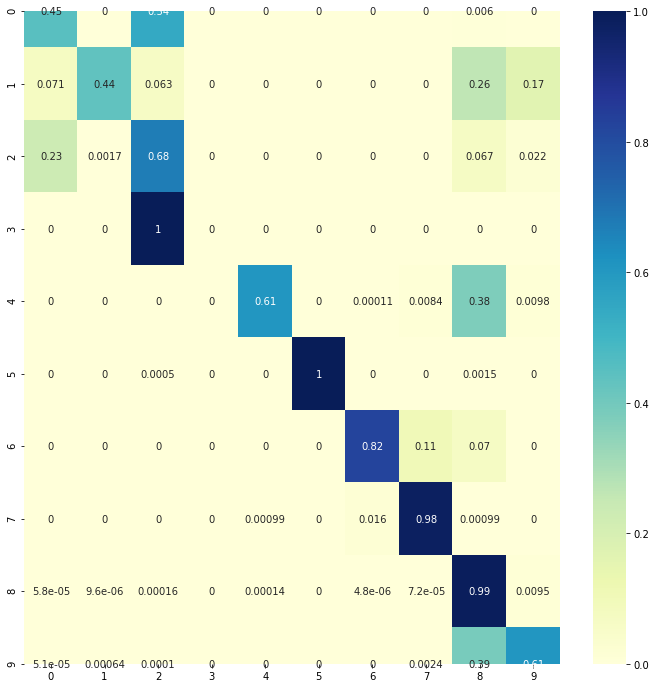

In [155]:
#Matriz de confusión normalizada donde se observa el % de clasificación. Por ejemplo:
#El 45% de las tipo 0 las clasifico como tipo 0. Pero el 54% de las tipo 0 las clasifico como tipo 2
#El 98% de las tipo7 las clasifico como tipo 7
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(Y)],columns = [i for i in np.unique(Y)])
plt.figure(figsize = (12,12))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

In [152]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [156]:
#El modelo tiene un Accuracy bastante alto ya que, a pesar de clasificar mal ciertos tipos, estos en cantidad son
#Muy pocos en comparacion de la clase 8, que representa el 80% de los datos, los cuales fueron muy bien clasificados..
#Es un problema que surge al tener datos no heterogeneos, donde la mayoria de los datos son de un mismo tipo.


# Conclusiones

*Diseño de políticas públicas de arbolado teniendo en cuenta cantidad de árboles por barrio, el tipo de arboles distribuido en la ciudad, para con esto poder planificar a futuro.

*Conociendo el tipo de hoja, se puede conocer en que época del año éstas caeran y planificar la recolección de las mismas.

*Analizar por barrio la presencia de árboles que provoquen algún tipo de alergia a la población, y tomar medidas al respecto.


*En caso de no saber que tipo de hoja tiene un árbol, con los datos usados como X seríamos capaces de clasificarlo